In [1]:
import math
import json
import re
import typing

import randomhash
import requests
import matplotlib.pyplot as plt

import windowed

In [2]:
orwell1984_text = requests.get("http://gutenberg.net.au/ebooks01/0100021.txt").content.decode("utf-8-sig")
orwell1984_normalized_text = re.sub("\s+", " ", re.sub("[^a-zA-Z\s]+", "", orwell1984_text)).lower()
orwell1984_tokens = orwell1984_normalized_text.split()

mobydick_text = requests.get("https://www.gutenberg.org/files/2701/2701-0.txt").content.decode("utf-8-sig")
mobydick_normalized_text = re.sub("\s+", " ", re.sub("[^a-zA-Z\s]+", "", mobydick_text)).lower()
mobydick_tokens = mobydick_normalized_text.split()

In [ ]:
af = windowed.AffSample(k=10)

In [ ]:
for token in mobydick_tokens[:1000]:
    af.process(token)

In [ ]:
af._stats._data

In [ ]:
waf = windowed.WindowedV2AffSample()

In [ ]:
for token in mobydick_tokens[:20000]:
    waf.process(token)

In [4]:
waf_v1 = windowed.WindowedV1AffSample()

waf_v1_windowed_sample_size = []
waf_v1_windowed_cardinality = []
waf_v1_windowed_cardinality_est = []

tokens = mobydick_tokens[:20000]

for timestamp, token in enumerate(tokens):
    waf_v1.process(token)
    waf_v1_windowed_sample_size.append(waf_v1.size)
    waf_v1_windowed_cardinality.append(len(set(tokens[max(0, timestamp - waf_v1.w):timestamp])))
    waf_v1_windowed_cardinality_est.append(waf_v1.cardinality_estimate)

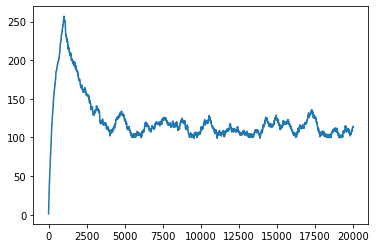

In [5]:
plt.plot(waf_v1_windowed_sample_size)

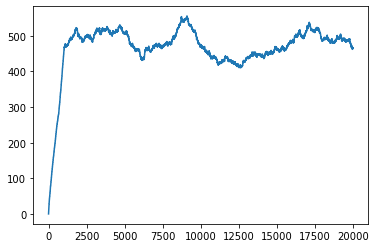

In [7]:
plt.plot(waf_v1_windowed_cardinality)

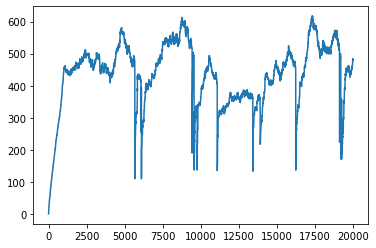

In [8]:
plt.plot(waf_v1_windowed_cardinality_est)

In [9]:
waf_v2 = windowed.WindowedV2AffSample()

waf_v2_windowed_sample_size = []
waf_v2_windowed_cardinality = []
waf_v2_windowed_cardinality_est = []

tokens = mobydick_tokens[:20000]

for timestamp, token in enumerate(tokens):
    waf_v2.process(token)
    waf_v2_windowed_sample_size.append(waf_v2.size)
    waf_v2_windowed_cardinality.append(len(set(tokens[max(0, timestamp - waf_v1.w):timestamp])))
    waf_v2_windowed_cardinality_est.append(waf_v2.cardinality_estimate)

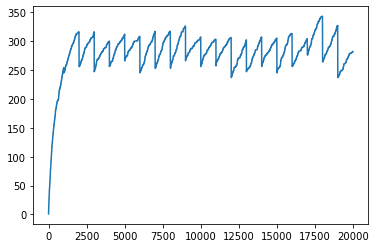

In [10]:
plt.plot(waf_v2_windowed_sample_size)

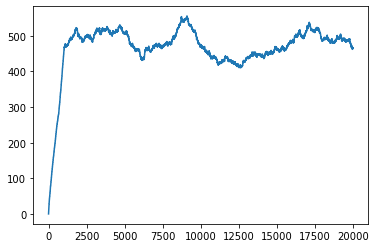

In [11]:
plt.plot(waf_v2_windowed_cardinality)

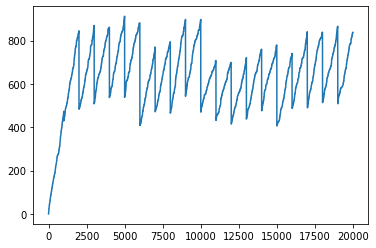

In [12]:
plt.plot(waf_v2_windowed_cardinality_est)